# ECGR 4105-001, Homework 4
## By Joshua Foster, 801268119

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Problem 1:

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels. 

In [17]:
# Load the dataset
datasets = load_breast_cancer()
X = datasets.data
y = datasets.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--- SVM Classifier Results ---

Results for LINEAR kernel:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



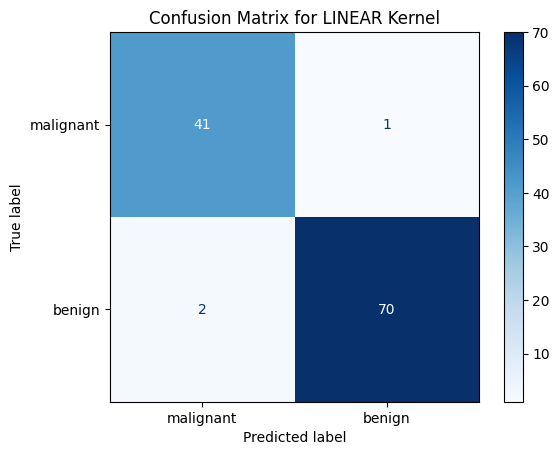


Results for POLY kernel:
              precision    recall  f1-score   support

   malignant       1.00      0.76      0.86        42
      benign       0.88      1.00      0.94        72

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



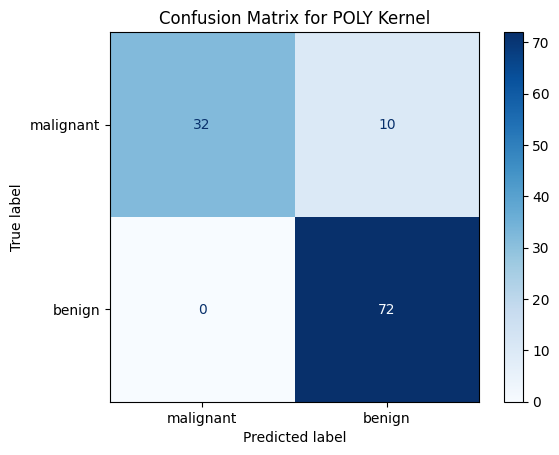


Results for RBF kernel:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



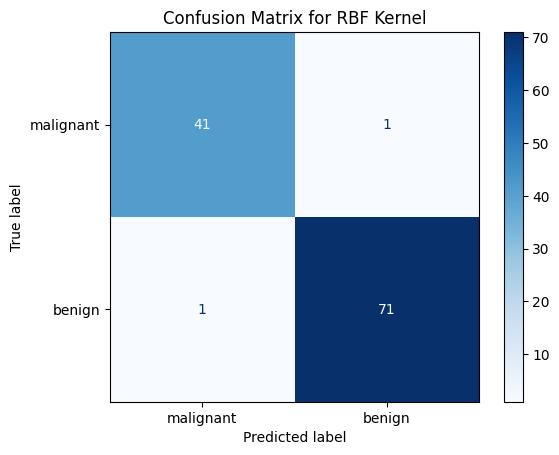


Results for SIGMOID kernel:
              precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



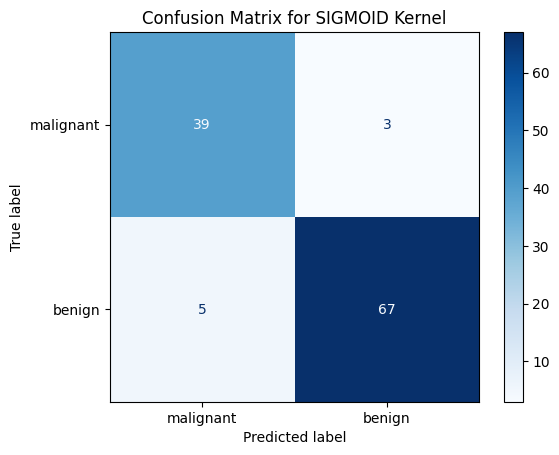


--- Summary of Results ---
         Accuracy  Precision    Recall
linear   0.973684   0.985915  0.972222
poly     0.912281   0.878049  1.000000
rbf      0.982456   0.986111  0.986111
sigmoid  0.929825   0.957143  0.930556


In [18]:
# Define the kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store results
results = {}

print("--- SVM Classifier Results ---")
for kernel in kernels:
    # 1. Create and train the SVM classifier
    model = svm.SVC(kernel=kernel, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # 2. Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # 3. Calculate and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }
    
    # 4. Print the classification report
    print(f"\nResults for {kernel.upper()} kernel:")
    print(classification_report(y_test, y_pred, target_names=datasets.target_names))

    # 5. Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=datasets.target_names)
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {kernel.upper()} Kernel')
    plt.show()


# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print("\n--- Summary of Results ---")
print(results_df)

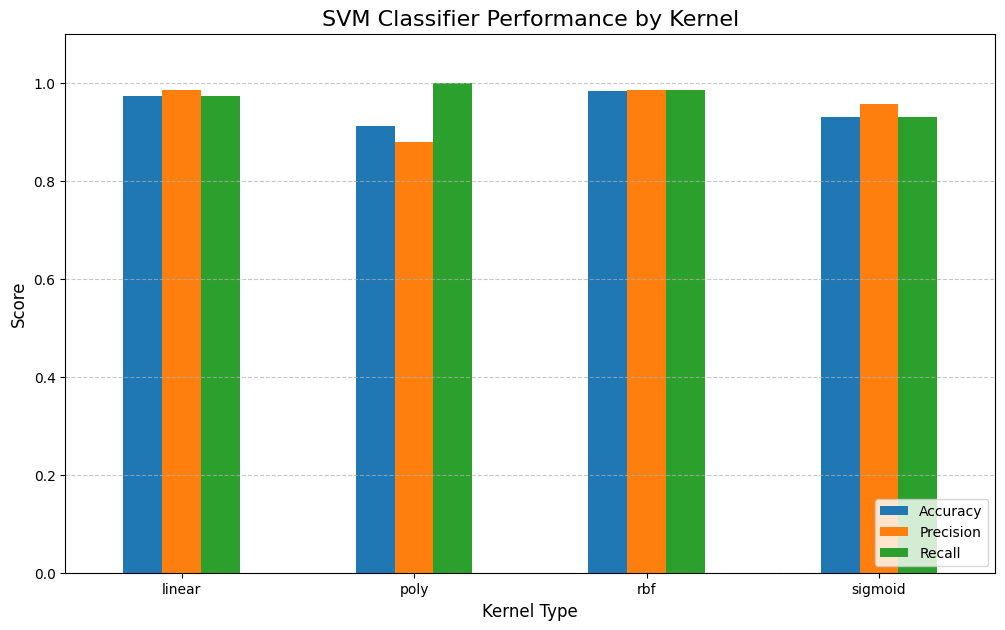

In [19]:
# Plot the results for comparison
results_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('SVM Classifier Performance by Kernel', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Kernel Type', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Problem 2:

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Plot your regression model for SVR similar to the sample code provided on the course GitHub. Compare your results against linear regression with regularization loss that you already did in homework1. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [20]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv('Housing.csv')
# Preprocess Data
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

    # Define features (X) and target (y)
    feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
    X = df[feature_cols]
    y = df['price']
    
    print("Data loaded and preprocessed successfully.")
    print(df.head())

Data loaded and preprocessed successfully.
      price  area  bedrooms  bathrooms  stories  mainroad guestroom basement  \
0  13300000  7420         4          2        3         1        no       no   
1  12250000  8960         4          4        4         1        no       no   
2  12250000  9960         3          2        2         1        no      yes   
3  12215000  7500         4          2        2         1        no      yes   
4  11410000  7420         4          1        2         1       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Data loaded and preprocessed successfully.
      p

In [21]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 436
Test samples: 109


In [22]:
# Scale features (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [23]:
# SVR with different kernels
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_rbf = SVR(kernel='rbf')

svr_linear.fit(X_train_scaled, y_train_scaled.ravel())
svr_poly.fit(X_train_scaled, y_train_scaled.ravel())
svr_rbf.fit(X_train_scaled, y_train_scaled.ravel())

# Linear Regression with Regularization (Ridge) for comparison
ridge = Ridge()
ridge.fit(X_train_scaled, y_train_scaled.ravel())

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [24]:
# Predictions are on the scaled data
y_pred_linear_scaled = svr_linear.predict(X_test_scaled)
y_pred_poly_scaled = svr_poly.predict(X_test_scaled)
y_pred_rbf_scaled = svr_rbf.predict(X_test_scaled)
y_pred_ridge_scaled = ridge.predict(X_test_scaled)

# Inverse transform predictions to get actual price values
y_pred_linear = scaler_y.inverse_transform(y_pred_linear_scaled.reshape(-1, 1)).flatten()
y_pred_poly = scaler_y.inverse_transform(y_pred_poly_scaled.reshape(-1, 1)).flatten()
y_pred_rbf = scaler_y.inverse_transform(y_pred_rbf_scaled.reshape(-1, 1)).flatten()
y_pred_ridge = scaler_y.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1)).flatten()

# Evaluate models 
metrics = {}
models = {
    'SVR (Linear)': y_pred_linear,
    'SVR (Poly)': y_pred_poly,
    'SVR (RBF)': y_pred_rbf,
    'Ridge (Linear)': y_pred_ridge
}

print("--- Model Performance on Test Set ---")
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics[name] = {'R2': r2, 'MSE': mse}
    print(f"{name}:")
    print(f"  R-squared ($R^2$): {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")

metrics_df = pd.DataFrame(metrics).T
metrics_df.sort_values('R2', ascending=False, inplace=True)

--- Model Performance on Test Set ---
SVR (Linear):
  R-squared ($R^2$): 0.6180
  Mean Squared Error (MSE): 1930883001174.78
SVR (Poly):
  R-squared ($R^2$): 0.5415
  Mean Squared Error (MSE): 2317528829710.52
SVR (RBF):
  R-squared ($R^2$): 0.5970
  Mean Squared Error (MSE): 2037241759268.85
Ridge (Linear):
  R-squared ($R^2$): 0.6436
  Mean Squared Error (MSE): 1801382721602.13


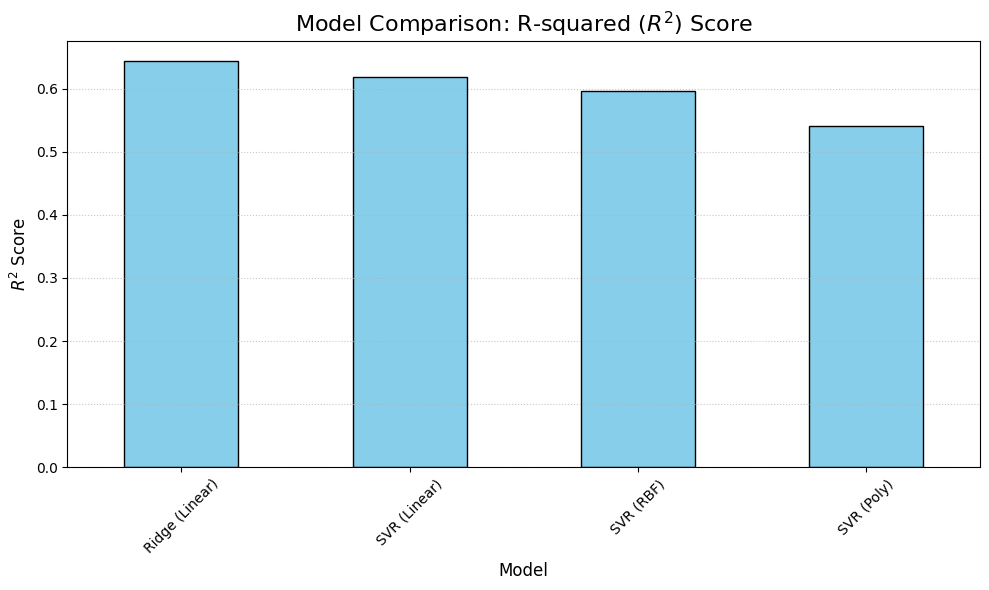

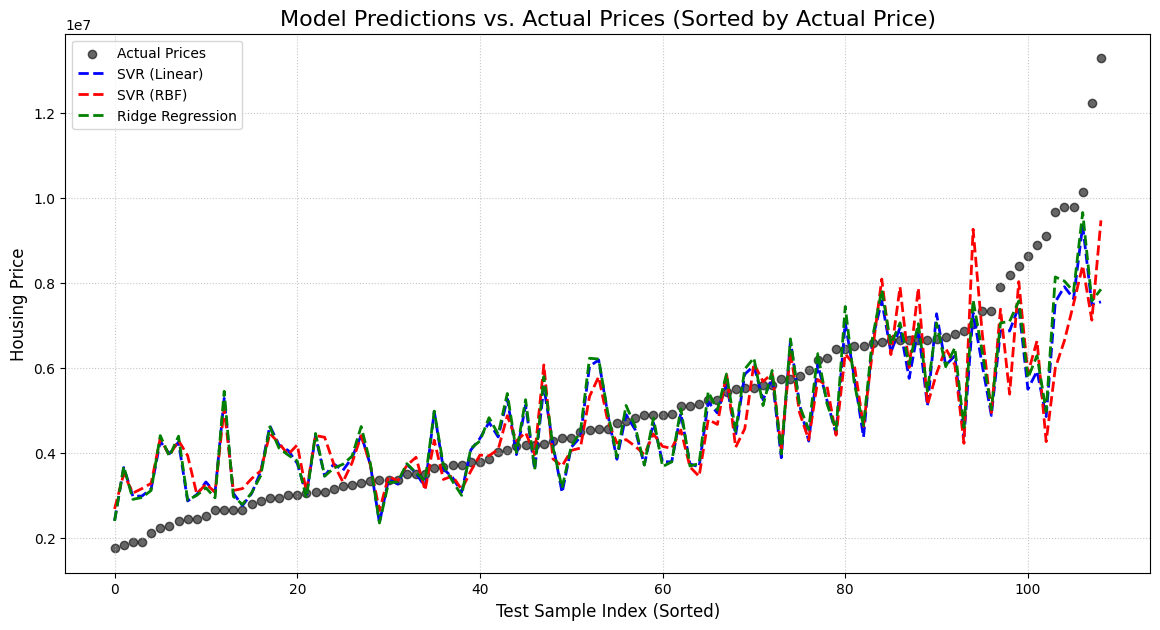

In [25]:
# Bar chart for R-squared comparison
metrics_df['R2'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Model Comparison: R-squared ($R^2$) Score', fontsize=16)
plt.ylabel('$R^2$ Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparison of Predictions vs Actual
sort_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sort_indices]
y_pred_linear_sorted = y_pred_linear[sort_indices]
y_pred_rbf_sorted = y_pred_rbf[sort_indices]
y_pred_ridge_sorted = y_pred_ridge[sort_indices]

plt.figure(figsize=(14, 7))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='black', label='Actual Prices', alpha=0.6)
plt.plot(range(len(y_test_sorted)), y_pred_linear_sorted, color='blue', linestyle='--', label='SVR (Linear)', linewidth=2)
plt.plot(range(len(y_test_sorted)), y_pred_rbf_sorted, color='red', linestyle='--', label='SVR (RBF)', linewidth=2)
plt.plot(range(len(y_test_sorted)), y_pred_ridge_sorted, color='green', linestyle='--', label='Ridge Regression', linewidth=2)
plt.title('Model Predictions vs. Actual Prices (Sorted by Actual Price)', fontsize=16)
plt.xlabel('Test Sample Index (Sorted)', fontsize=12)
plt.ylabel('Housing Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()